## Imports

In [3]:
!pip install wordcloud

In [145]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from sklearn.metrics import (
    silhouette_score, 
    calinski_harabasz_score, 
    davies_bouldin_score
)
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

## Read in data

In [6]:
df = pd.read_csv("final_perfume_data.csv", encoding='unicode_escape')

In [7]:
df.head()

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...


In [8]:
df.dtypes

Name           object
Brand          object
Description    object
Notes          object
Image URL      object
dtype: object

In [9]:
df.columns

Index(['Name', 'Brand', 'Description', 'Notes', 'Image URL'], dtype='object')

In [10]:
df.shape

(2191, 5)

In [11]:
df = df.drop(columns="Image URL")

In [12]:
df.columns

Index(['Name', 'Brand', 'Description', 'Notes'], dtype='object')

## Pre-processing

In [14]:
df.isna().sum()

Name            0
Brand           0
Description     0
Notes          80
dtype: int64

In [15]:
## keeping the og df just in case!
df_drop = df.dropna

In [16]:
## trying out how to seperate the notes!! :D
## i referenced code from the anime demo, please feel free to change this to something better! - sky
## changing it to a commma with a space after adds more scents, but it adds one like "your guess is as good as ours." lol
## some scents are definitely missing with this!!!
df_enc = df.join(pd.concat([df['Notes'].str.get_dummies(sep=',')])).drop('Notes',axis=1)

In [17]:
df_enc.shape

(2191, 4005)

In [18]:
df_enc.head()

,Name,Brand,Description,,Amber and Canadian Fir Balsam,Caramel,Clary Sage,Ethiopian Myrrh,Geranium Flower,Guaiac Wood,...,jasmine,lemony,lily,ocean,oolong,red berries,sage,spiced plums,tobacco,vanilla
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizations

In [20]:
note_melt = pd.melt(df_enc, id_vars=None,
     value_vars=['   Amber and Canadian Fir Balsam',
       '   Caramel', '   Clary Sage', '   Ethiopian Myrrh',
       '   Geranium Flower', '   Guaiac Wood',
       'jasmine', 'lemony', 'lily', 'ocean', 'oolong', 'red berries', 'sage',
       'spiced plums', 'tobacco', 'vanilla'],
     var_name='Notes', value_name='Scent')

Text(0.5, 1.0, 'Ratio of Notes')

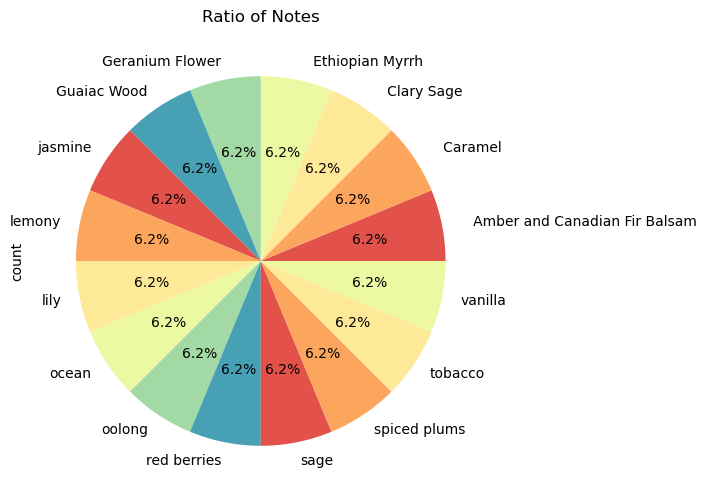

In [21]:
## pie chart of notes to start
plt.figure(figsize=(10,6))
note_melt['Notes'].value_counts().plot.pie(autopct='%1.1f%%', startangle=0, colors=sns.color_palette("Spectral"))
plt.title('Ratio of Notes')

In [22]:
df_enc.head()

,Name,Brand,Description,,Amber and Canadian Fir Balsam,Caramel,Clary Sage,Ethiopian Myrrh,Geranium Flower,Guaiac Wood,...,jasmine,lemony,lily,ocean,oolong,red berries,sage,spiced plums,tobacco,vanilla
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


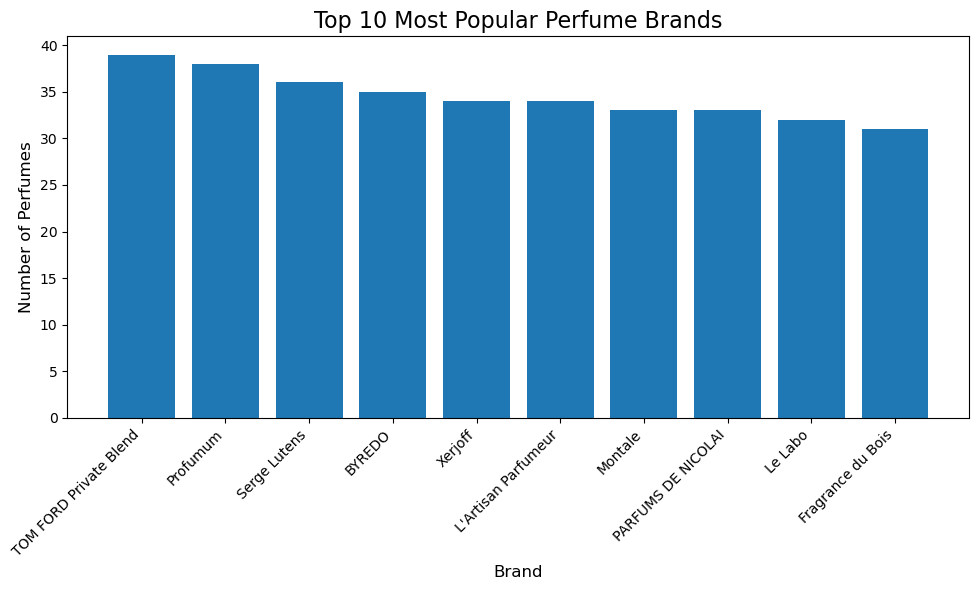

In [23]:
import matplotlib.pyplot as plt

# Count the occurrences of each brand
brand_counts = df['Brand'].value_counts().head(10)  # Top 10 most frequent brands

# Plot a bar chart of the most popular brands
plt.figure(figsize=(10, 6))
plt.bar(brand_counts.index, brand_counts.values)
plt.title('Top 10 Most Popular Perfume Brands', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Perfumes', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [24]:
#### Build word cloud for the Notes feature

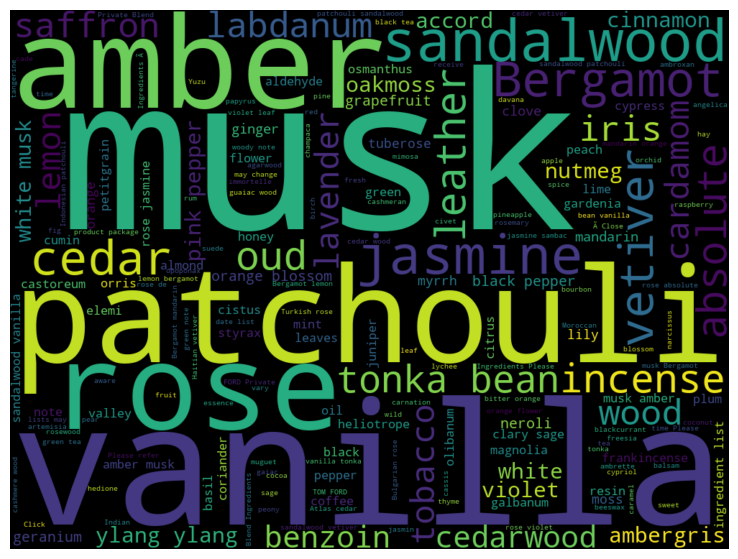

In [25]:
notes = " ".join(df['Notes'].dropna().astype(str).values)  
wc = WordCloud(
    background_color='black',
    stopwords=STOPWORDS,
    height=750,
    width=1000
)

word_cloud = wc.generate(notes)
plt.figure(figsize=(10, 7))  # Adjust figure size for better visualization
plt.imshow(word_cloud, interpolation='bilinear')  # Better rendering
plt.axis("off")  # Turn off axis for cleaner display
plt.show()

## Modelling and Evaluation

In [61]:
#Evaluation function
def evaluate(X,labels):
    results = {}
    results['Inertia'] = kmeans.inertia_
    if len(set(labels)) - (1 if -1 in labels else 0) > 1:
        results['Silhouette Score'] = silhouette_score(X, labels)
        results['Calinski-Harabasz Index'] = calinski_harabasz_score(X, labels)
        results['Davies-Bouldin Index'] = davies_bouldin_score(X, labels)
    return results

In [29]:
# Combine 'Description' and 'Notes' columns for feature extraction

In [40]:
df['Combined_Features'] = df['Description'].fillna('') + ' ' + df['Notes'].fillna('')

In [41]:
df['Combined_Features'].head()

0     Rapa Nui for sugar, Tihota is, quite simply, ...
1     A tribute to the expanse of space extending f...
2     An aromatic ode to the ancient beauty of Japa...
3     Velvet Fantasy is a solar fragrance where cit...
4     There's no way A Lab On Fire could relocate t...
Name: Combined_Features, dtype: object

In [211]:
#Convert combined features text into numerical
vectorizer = TfidfVectorizer(stop_words='english')
cm = vectorizer.fit_transform(df['Combined_Features'])

scaler = StandardScaler(with_mean=False)
scaled_features = scaler.fit_transform(X)

agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
df['cluster'] = agglo.fit_predict(scaled_features)

evaluate(scaled_features, df['cluster'])

{'Inertia': 97297.19829692366,
 'Silhouette Score': 0.5188113778947957,
 'Calinski-Harabasz Index': 42.91919388226503,
 'Davies-Bouldin Index': 0.42133074360911826}

### Recommender System

In [350]:
def recommend_perfumes(name, num_recommendations):
    try:
        # Find the cluster of the given perfume by matching its name
        perfume_idx = df[df['Name'].str.contains(name, case=False, na=False)].index[0]
        perfume_cluster = df.loc[perfume_idx, 'cluster']
    except IndexError:
        return f"No perfume found with the name '{name}'."
    
    same_cluster = df[df['cluster'] == perfume_cluster]
    same_cluster_idx = same_cluster.index

    
    similarity_scores = cosine_similarity(cm[perfume_idx], cm[same_cluster_idx])
    same_cluster['similarity_score'] = similarity_scores.flatten()

    # Skip first perfume
    recommendations = same_cluster.sort_values(by='similarity_score', ascending=False).iloc[1:num_recommendations + 1]

    recommendations = recommendations.reset_index(drop=True)
    recommendations.index = recommendations.index+1
    return (recommendations[['Name', 'Brand']])

In [352]:
# Test the recommender system
recommendations = recommend_perfumes('Tihota', 5)
print(recommendations)

                                       Name                     Brand
1              Vanille Absolu Eau de Parfum                   Montale
2                         Sucre Noir Parfum              Arte Profumi
3  Vanille Noire du Mexique Eau de Toilette  La Maison de la  Vanille
4                     Vanitas Eau de Parfum                  Profumum
5          Vanille Insensee Cologne Absolue           Atelier Cologne


C:\Users\tahiy\AppData\Local\Temp\ipykernel_17908\3532459734.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_cluster['similarity_score'] = similarity_scores.flatten()
